In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import time
import random

# Read the data
df = pd.read_csv('loan_history_almost_clean.csv')
df.head()

,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
0,0,1000,B,2.0,0,19200.0,24
1,1,6500,A,2.0,1,66000.0,28
2,0,2400,A,2.0,0,60000.0,36
3,0,10000,C,3.0,0,62000.0,24
4,1,4000,C,2.0,0,20000.0,28


# Initial Inspection

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            7727 non-null   int64  
 1   amount_of_loan     7727 non-null   int64  
 2   credit_rating      7727 non-null   object 
 3   years_with_bank    7726 non-null   float64
 4   rent_mortgage_own  7727 non-null   int64  
 5   income             7727 non-null   float64
 6   age                7727 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 422.7+ KB


credit rating is the only column with non numerical data, we can easily map it to numerical values

In [3]:
df.shape

(7727, 7)

# Data Cleaning

In [4]:
# Count the number of missing values in each column
df.isnull().sum()

# Only 1 entry has a null value

default              0
amount_of_loan       0
credit_rating        0
years_with_bank      1
rent_mortgage_own    0
income               0
age                  0
dtype: int64

In [5]:
# Drop the only row with a null value
df.dropna(inplace=True)

In [6]:
# Convert the credit rating to a numeric value
df['credit_rating'] = df['credit_rating'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

# This turns the credit rating into a numeric value where a lower number is a better credit rating

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            7726 non-null   int64  
 1   amount_of_loan     7726 non-null   int64  
 2   credit_rating      7726 non-null   int64  
 3   years_with_bank    7726 non-null   float64
 4   rent_mortgage_own  7726 non-null   int64  
 5   income             7726 non-null   float64
 6   age                7726 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 482.9 KB


Everything is now numerical and non null, we can move on to exploring the data and checking for outliers

# Data Exploration
<h4> Looking for outliers and normality</h4>

array([[<AxesSubplot:title={'center':'default'}>,
        <AxesSubplot:title={'center':'amount_of_loan'}>,
        <AxesSubplot:title={'center':'credit_rating'}>],
       [<AxesSubplot:title={'center':'years_with_bank'}>,
        <AxesSubplot:title={'center':'rent_mortgage_own'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

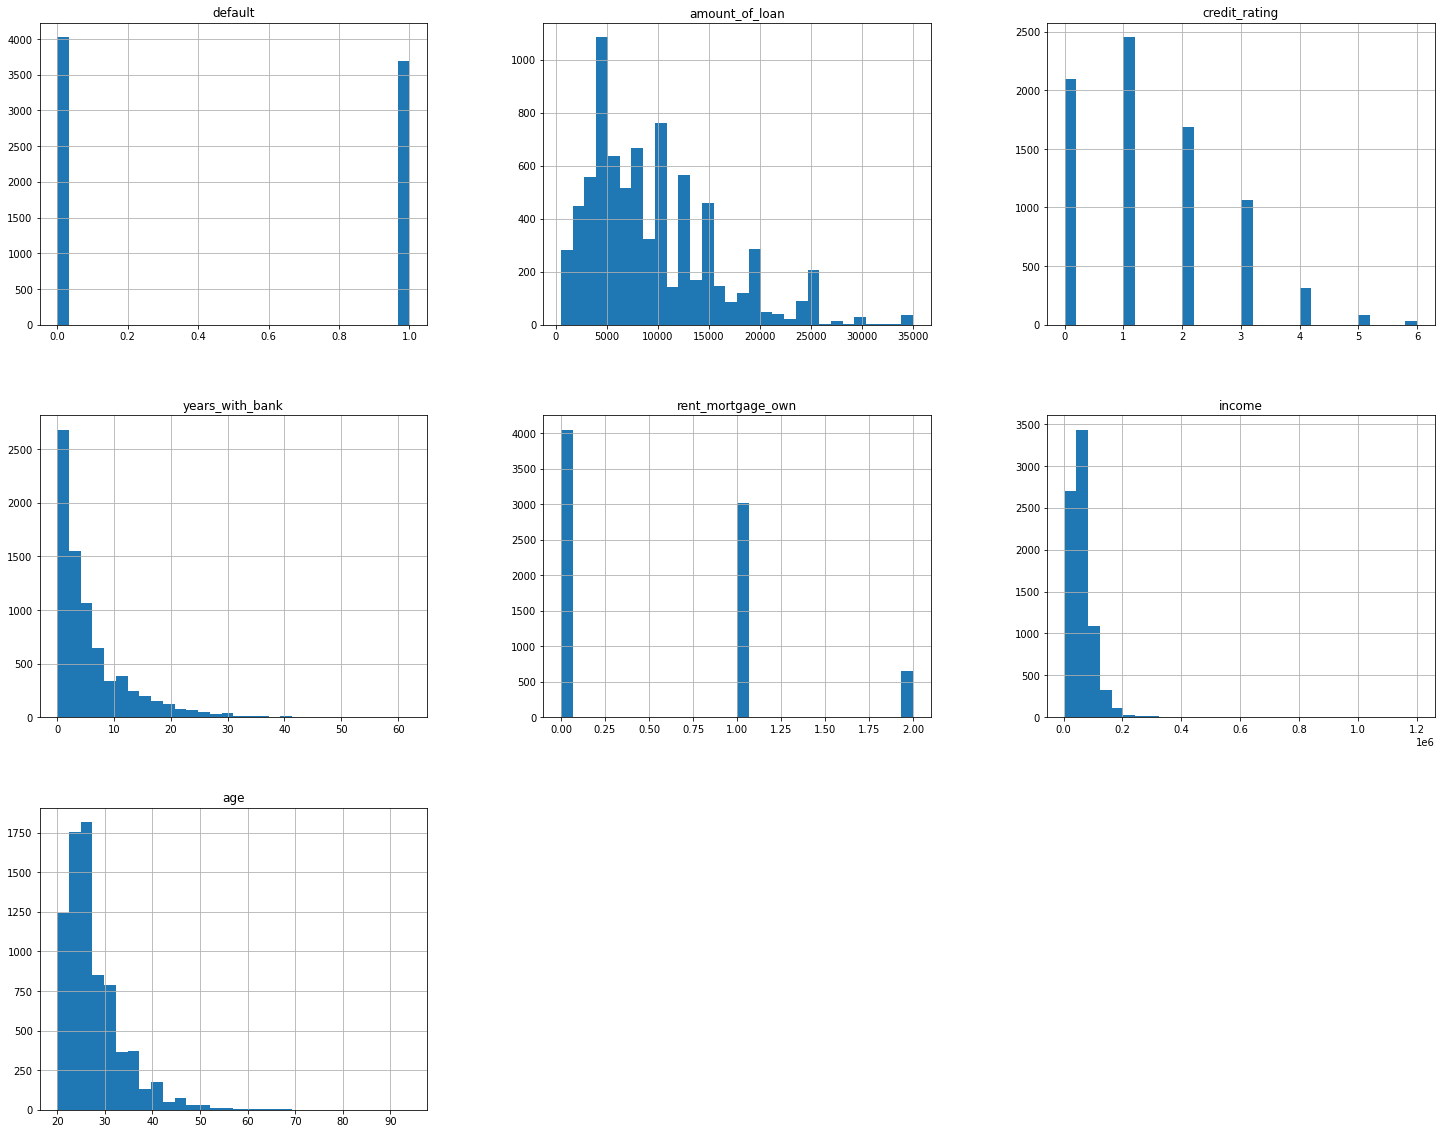

In [8]:
# Plot every column as histograms
df.hist(bins=30, figsize=(25, 20))

In [9]:
df.describe()

,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
count,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7.726000e+03,7726.000000
mean,0.478514,9454.245405,1.404090,6.044654,0.560057,6.337427e+04,27.542066
std,0.499570,6298.506573,1.226906,6.600555,0.644984,4.687455e+04,6.132515
min,0.000000,500.000000,0.000000,0.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,0.000000,2.000000,0.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,1.000000,4.000000,0.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,2.000000,8.000000,1.000000,7.679825e+04,30.000000
max,1.000000,35000.000000,6.000000,62.000000,2.000000,1.200000e+06,94.000000


Lets check how the correlation is between the variables and then remove outliers to see if that makes a difference

We see that there are many outliers with income, years with the bank, and the age

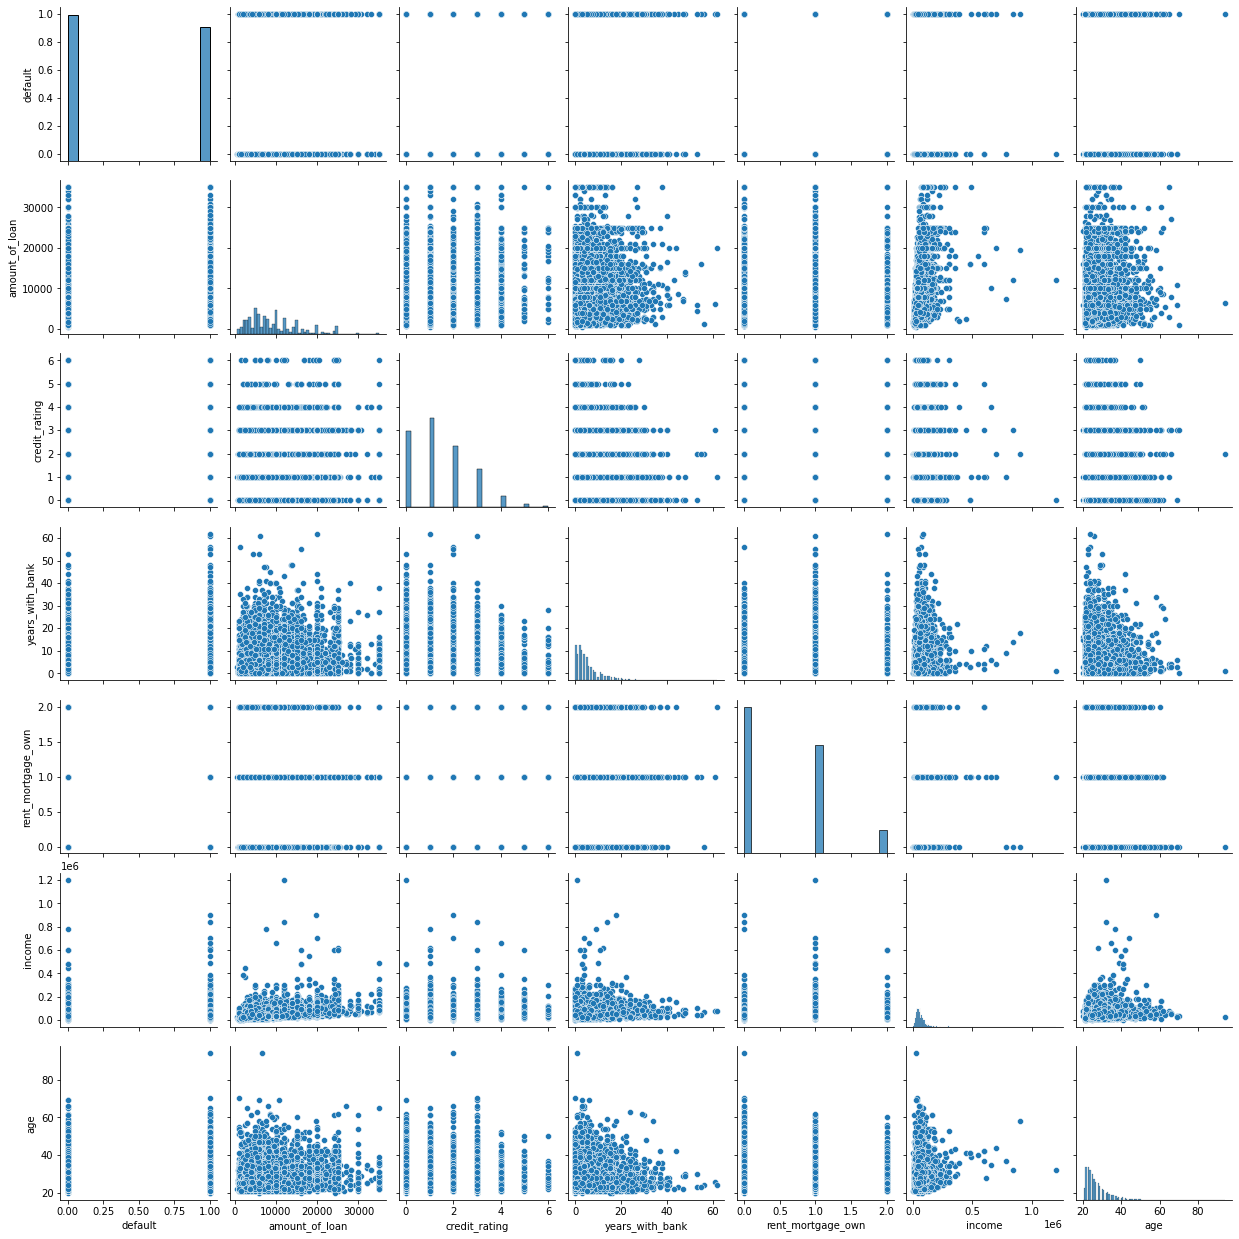

In [10]:
sns.pairplot(df)

<AxesSubplot:>

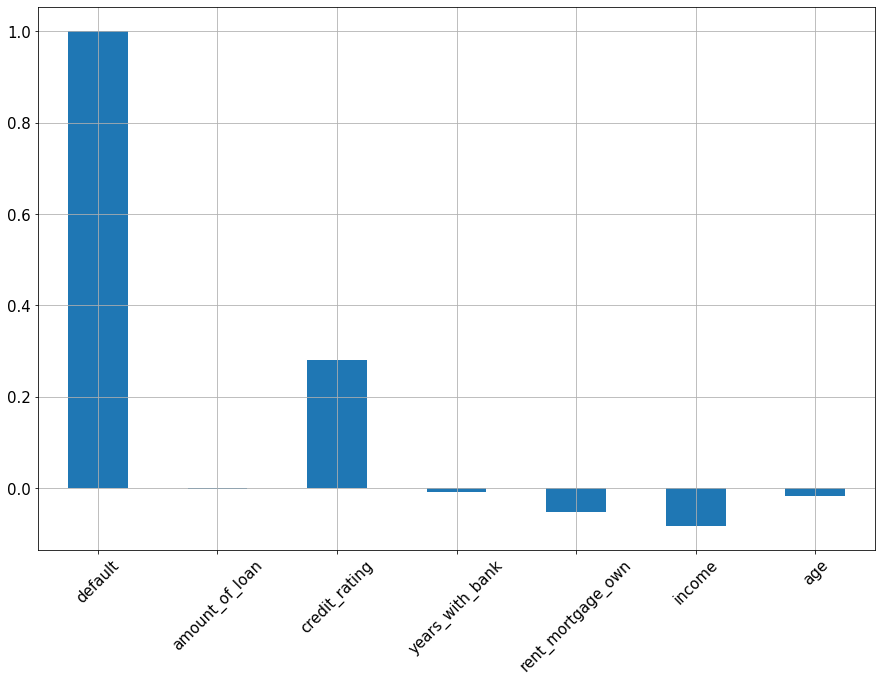

In [11]:
#Correlation with Quality with respect to attributes
df.corrwith(df.default).plot.bar(figsize = (15, 10), fontsize = 15, rot = 45, grid = True)

We see that credit rating has some correlation with respect to defaulting but other than that the correlation is not very high

<AxesSubplot:>

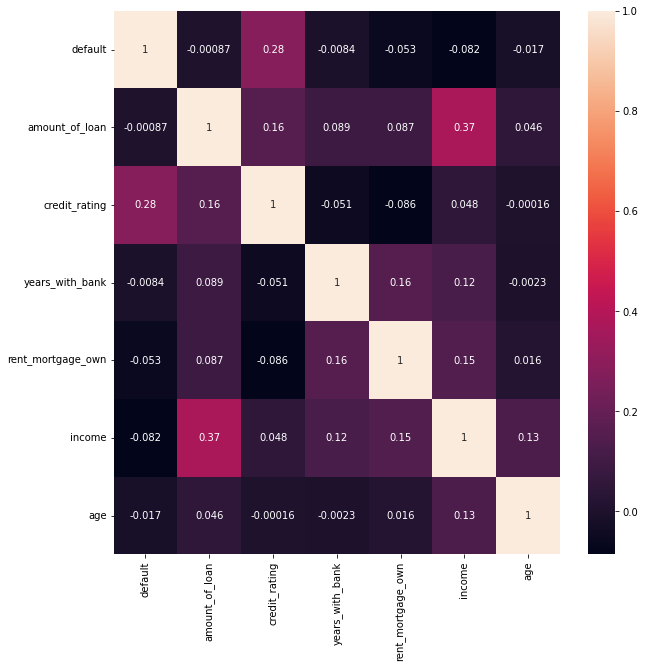

In [12]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Not a lot of correlation... lets try removing outliers and see if it helps

Again we see that only credit rating has a higher correlation with defaulting

# Handling Outliers

We want to remove outliers in an attempt to make our data more normal but we want to be careful not to delete more than 5% of the data

In [13]:
# Delete any entries where the income is greater than the 98 percentile
df2 = df[df['income'] < df['income'].quantile(0.98)]

In [14]:
# Checking how much data we lost
print(len(df))
print(len(df2))

# Printing it in terms of a percentage
print((len(df)-len(df2))/len(df)*100, '%')

# Only 3 percent of the data was lost so we can continue with this data

7726
7570
2.019156096298214 %


In [15]:
# Lets do the same with years with the bank
df2 = df2[df2['years_with_bank'] < df2['years_with_bank'].quantile(0.98)]

In [16]:
# Checking how much data we lost
print(len(df2))
print(len(df))

# Printing it in terms of a percentage
print((len(df)-len(df2))/len(df)*100, '%')

7412
7726
4.064198809215636 %


In [17]:
# Lastly we will do the same with the age
df2 = df2[df2['age'] < df2['age'].quantile(0.99)]

# Checking how much data we lost
print(len(df2))
print(len(df))

# Printing it in terms of a percentage
print((len(df)-len(df2))/len(df)*100, '%')

7329
7726
5.138493398912762 %


We have deleted just about 5% of the data, lets see if it makes a difference

array([[<AxesSubplot:title={'center':'default'}>,
        <AxesSubplot:title={'center':'amount_of_loan'}>,
        <AxesSubplot:title={'center':'credit_rating'}>],
       [<AxesSubplot:title={'center':'years_with_bank'}>,
        <AxesSubplot:title={'center':'rent_mortgage_own'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

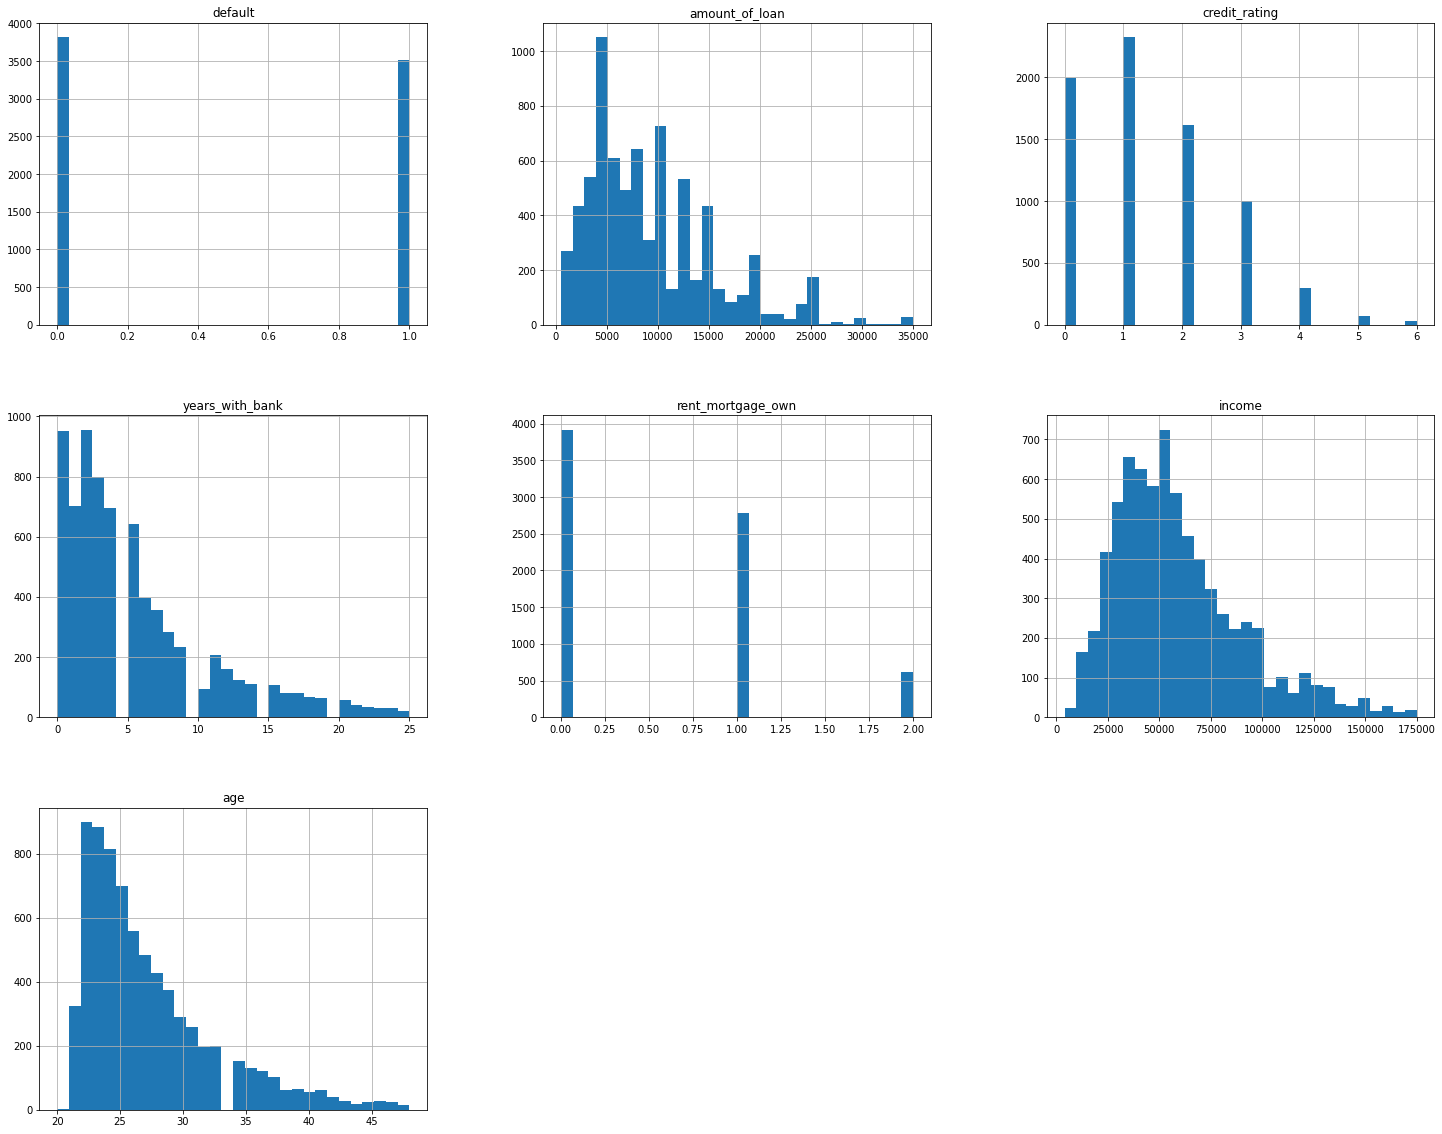

In [18]:
# Plot every column as histograms
df2.hist(bins=30, figsize=(25, 20))

It definitley made a difference to the graphs, they are looking much more normal but it looks skewed and I'm not sure how to fix that

In [19]:
# Looking at the sknewness of the data
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Check the skew of all numerical features
skewed_feats = df2.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
years_with_bank,1.417985
age,1.354658
amount_of_loan,1.166375
income,1.022490
rent_mortgage_own,0.758202
credit_rating,0.747803
default,0.084398


In [20]:
# Trying to fix the skewness by bucketing the ages
df2['age'] = df2['age'].map(lambda x: 0 if x < 20 else 1 if x < 22 else 2 if x < 25 else 3 if x < 35 else 4 if x < 40 else 5)

array([[<AxesSubplot:title={'center':'default'}>,
        <AxesSubplot:title={'center':'amount_of_loan'}>,
        <AxesSubplot:title={'center':'credit_rating'}>],
       [<AxesSubplot:title={'center':'years_with_bank'}>,
        <AxesSubplot:title={'center':'rent_mortgage_own'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

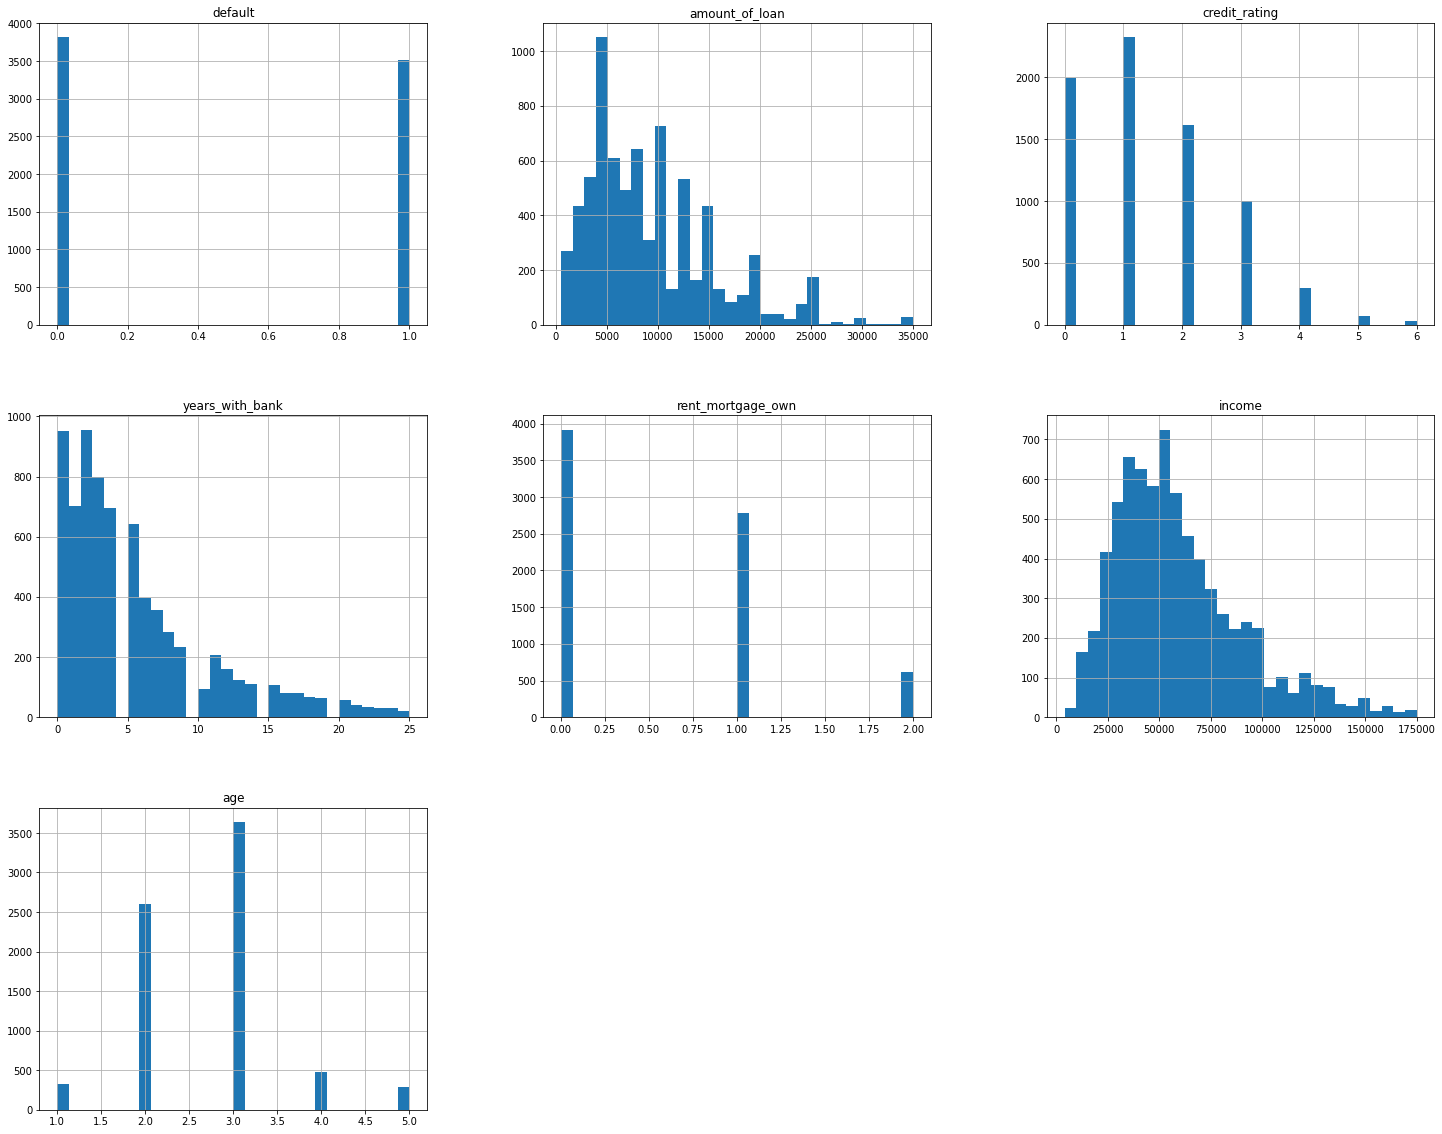

In [21]:
# Plot every column as histograms
df2.hist(bins=30, figsize=(25, 20))

Bucketing the age kind of helped but still not great, let's see if our correlation improved any

In [22]:
df2.describe()

,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
count,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000
mean,0.478919,9256.382180,1.397053,5.455178,0.549325,58950.012778,2.700778
std,0.499589,6117.935708,1.218410,5.320302,0.645189,30512.687885,0.817955
min,0.000000,500.000000,0.000000,0.000000,0.000000,4000.000000,1.000000
25%,0.000000,5000.000000,0.000000,2.000000,0.000000,36000.000000,2.000000
50%,0.000000,8000.000000,1.000000,4.000000,0.000000,53000.000000,3.000000
75%,1.000000,12000.000000,2.000000,7.000000,1.000000,75000.000000,3.000000
max,1.000000,35000.000000,6.000000,25.000000,2.000000,174996.000000,5.000000


<AxesSubplot:>

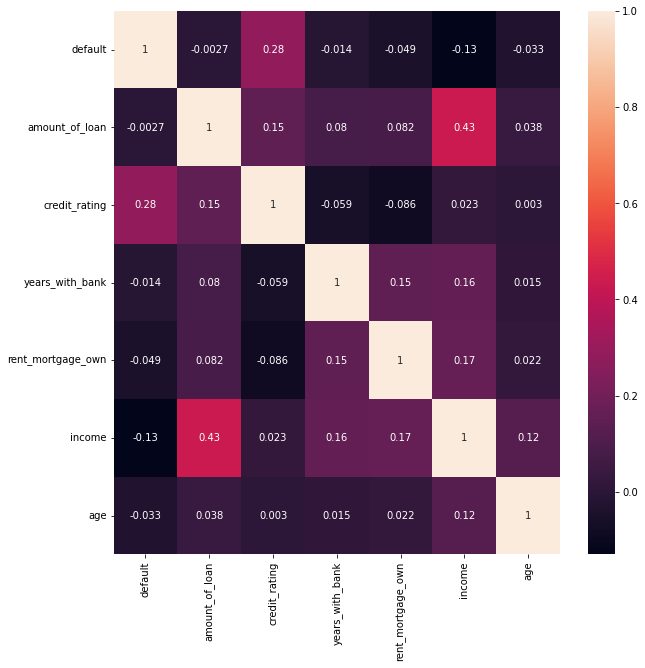

In [23]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True)

It didn't really improve the correlation with defaulting but it did improve the correlation with some other features.

# Model Building

## Looping through a bunch of algos

In [24]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

# import a whole bunch of regression models (classify to a range)
# Logistic regression
from sklearn.linear_model import LogisticRegression
# decision tree
from sklearn.tree import DecisionTreeClassifier
# random forest
from sklearn.ensemble import RandomForestClassifier
# gradient boost
from sklearn.ensemble import GradientBoostingClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Support Vector Machine
from sklearn.svm import SVC
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

# measuring how we do 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# scaler
from sklearn.preprocessing import StandardScaler

# create a list of regression models to try
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), GaussianNB(), SVC(), SGDClassifier()]
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 KNeighborsClassifier(),
 GaussianNB(),
 SVC(),
 SGDClassifier()]

In [25]:
# y = df2['default']
y = df['default']

# x = df2[['credit_rating', 'income', 'age']]
# x = df2[['credit_rating', 'income', 'age', 'years_with_bank', 'amount_of_loan', 'rent_mortgage_own']]
x = df[['credit_rating', 'income', 'age']] # 0.652652

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=95)

# Code taken from your notebook that loops through each model and train on the same training data
print('We want low MSE and MAE and an R-squared as close to 1 as possible')
for model in models:
    print('\n'+ type(model).__name__)
    model.fit(x_train, y_train.ravel())

    # make prediction on test set
    y_pred = model.predict(x_test)
    
    # report effectiveness of model
    # use MSE, MAE and R-2
    # (no confusion matrix, because we are predicting in a range and not classifying to a set)
    print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_pred)))
    print('MAE: {0:.4f}'.format(mean_absolute_error(y_test, y_pred)))
    print('R-squared: {0:.4f}'.format(r2_score(y_test, y_pred)))
    print('Accuracy: {0:.4f}'.format(model.score(x_test, y_test)))

We want low MSE and MAE and an R-squared as close to 1 as possible

LogisticRegression
MSE: 0.3473
MAE: 0.3473
R-squared: -0.3955
Accuracy: 0.6527

DecisionTreeClassifier
MSE: 0.4023
MAE: 0.4023
R-squared: -0.6164
Accuracy: 0.5977

RandomForestClassifier
MSE: 0.3959
MAE: 0.3959
R-squared: -0.5904
Accuracy: 0.6041

GradientBoostingClassifier
MSE: 0.3706
MAE: 0.3706
R-squared: -0.4890
Accuracy: 0.6294

KNeighborsClassifier
MSE: 0.4056
MAE: 0.4056
R-squared: -0.6293
Accuracy: 0.5944

GaussianNB
MSE: 0.3551
MAE: 0.3551
R-squared: -0.4266
Accuracy: 0.6449

SVC
MSE: 0.4444
MAE: 0.4444
R-squared: -0.7853
Accuracy: 0.5556

SGDClassifier
MSE: 0.5330
MAE: 0.5330
R-squared: -1.1413
Accuracy: 0.4670


It appears that logistic regression is the best model out of the bunch so lets try to build a logistic regression model and see how it performs

## Logistic Regression

In [26]:
# Trying logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# SEEM TO GET HIGHER ACCURACY WITH THE UNCLEANED DATA


# Split the data into training and testing
y = df['default']

# x = df[['credit_rating', 'income']] # 0.5168175
# x = df[['years_with_bank', 'amount_of_loan']] # 0.5168175
# x = df[['credit_rating', 'income', 'years_with_bank']] # 0.5168175
# x = df[['income', 'age']] # 0.0.559508
# x = df[['credit_rating', 'income', 'years_with_bank', 'age', 'amount_of_loan']] # 0.56856403
# x = df2[['credit_rating', 'income', 'years_with_bank', 'age', 'amount_of_loan', 'rent_mortgage_own']] # 0.59
# x = df[['credit_rating', 'income', 'years_with_bank', 'age']] # 0.5692108
# x = df[['credit_rating', 'income', 'age']] # 0.652652

x = df[['amount_of_loan', 'income', 'credit_rating']] #  0.659120

# Making a loop to find the best random_state
# for i in range(1, 100):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
#     model = LogisticRegression()
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     print('R^2 value: ',model.score(x_test, y_test), 'random_state: ', i)

# 79 is the best random_state for these features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

# Create the model
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Check the accuracy
print('Accuracy: ',model.score(x_test, y_test))

Accuracy:  0.6591203104786546


The accuracy of the logistic regression model is 0.651903 which is not great but the best I can seem to get.

The weird thing is that our model does better with the uncleaned dataframe (df) than it does with the cleaned dataframe (df2). I am not sure why this is the case.

In [27]:
# Displaying the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# TN FP
# FN TP

array([[519, 252],
       [275, 500]], dtype=int64)

This does somewhat satisfies the banks request of having the false positives be lower than the false negatives. Although I still wish I could get the accuracy higher.

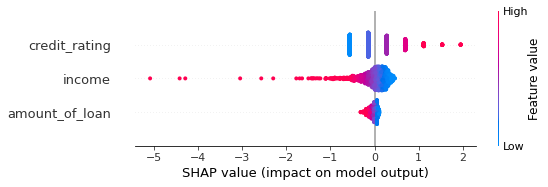

In [28]:
# Showing the shap values
import shap
explainer = shap.LinearExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

From the shap values we can see that the most important features are credit rating, income, and the amount of the loan.

- A higher lower number credit rating (meaning a better rating) is less likely to default on a loan. 

- A higher income is less likely to default on a loan. 

- The amount of the loan doesn't have the biggest impact on the model but we can see that the higher amount of the loan the less likely it is to default which is not what I expected.

## Trying Boosting

### ADA Boost

In [29]:
y = df['default']

# X = df2.drop(['default'], axis=1)
# X = df2[['credit_rating', 'income', 'age']]
# X = df[['credit_rating', 'income', 'age']]
# X = df.drop(['default'], axis=1)
X = df[['amount_of_loan', 'income', 'credit_rating']] # 0.6294

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import AdaBoostClassifier

# single tree
ab_model = AdaBoostClassifier(n_estimators=35) # 35 estimators is optimal as discovered in the code that follows
# train it
ab_model.fit(X_train,y_train)

ab_predict_train = ab_model.predict(X_train)

# training metrics
from sklearn import metrics
print("Accuracy of model on TRAINING SET: {0:.4f}".format(metrics.accuracy_score(y_train, ab_predict_train)))

ab_predict_test = ab_model.predict(X_test)
print("\nAccuracy of model on TEST SET: {0:.4f}".format(metrics.accuracy_score(y_test, ab_predict_test)))
print("")
# confusion matrix and classification report
print(metrics.confusion_matrix(y_test, ab_predict_test) )
print("")
print("TEST SET - Classification Report\n")
print(metrics.classification_report(y_test, ab_predict_test))

Accuracy of model on TRAINING SET: 0.6484

Accuracy of model on TEST SET: 0.6294

[[536 263]
 [310 437]]

TEST SET - Classification Report

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       799
           1       0.62      0.59      0.60       747

    accuracy                           0.63      1546
   macro avg       0.63      0.63      0.63      1546
weighted avg       0.63      0.63      0.63      1546



In [30]:
# adding more learners
learners = 100

# track error rates for each new learner, in a list
error_rates = []

for n in range(1,learners):
    ab_model = AdaBoostClassifier(n_estimators=n)
    ab_model.fit(X_train,y_train)
    preds = ab_model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    print(n, err)
    error_rates.append(err)

1 0.3783958602846055
2 0.3783958602846055
3 0.3783958602846055
4 0.3783958602846055
5 0.3783958602846055
6 0.3771021992238034
7 0.38745148771022
8 0.38745148771022
9 0.38680465717981893
10 0.3835705045278137
11 0.3835705045278137
12 0.3835705045278137
13 0.3835705045278137
14 0.3829236739974127
15 0.38227684346701163
16 0.38227684346701163
17 0.38227684346701163
18 0.3848641655886158
19 0.3848641655886158
20 0.3816300129366106
21 0.3829236739974127
22 0.3816300129366106
23 0.3829236739974127
24 0.3835705045278137
25 0.3829236739974127
26 0.3829236739974127
27 0.3829236739974127
28 0.3816300129366106
29 0.37192755498059504
30 0.369340232858991
31 0.37192755498059504
32 0.371280724450194
33 0.37063389391979307
34 0.37063389391979307
35 0.37063389391979307
36 0.36869340232858994
37 0.36869340232858994
38 0.369987063389392
39 0.369987063389392
40 0.37063389391979307
41 0.37063389391979307
42 0.37192755498059504
43 0.37192755498059504
44 0.3725743855109961
45 0.37322121604139713
46 0.373221

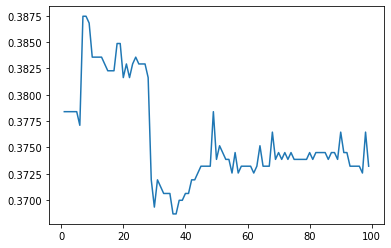

In [31]:
# plot to show reducing error rate as more learners are added
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,learners),error_rates)

In [32]:
error_rates.index(min(error_rates))

35

This is our optimal number of estimators that yields the lowest error rate, we can plug 35 into our original model

### Gradient Boost

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# let's do a gridsearch
from sklearn.model_selection import GridSearchCV

# create a dictionary of all values we want to test for n_estimators
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)

y = df['default']
# X = df[['credit_rating', 'income', 'age']]
X = df.drop(['default'], axis=1)
# X = df2.drop(['default'], axis=1) # 0.6378

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model to data
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [34]:
# display the optimal ones
grid.best_params_

{'max_depth': 6, 'n_estimators': 40}

In [35]:
# and the scores for the optimal config
# call predict on the grid
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       799
           1       0.64      0.60      0.62       747

    accuracy                           0.64      1546
   macro avg       0.64      0.64      0.64      1546
weighted avg       0.64      0.64      0.64      1546



In [36]:
# Print accuracy score
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.6404


## Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RepeatedKFold, cross_val_score
from numpy import mean
from numpy import std

y = df['default']
# X = df.drop(['default'], axis=1) # 0.600194
# X = df[['credit_rating', 'income', 'age']] # 0.61182
# X = df2.drop(['default'], axis=1) # 0.5562
# X = df2[['credit_rating', 'income', 'age']] # 0.52108
X = df[['amount_of_loan', 'income', 'credit_rating']]

# k-fold

# set the parameters
# feel free to play with these
cv = KFold(n_splits=10, random_state=12, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance

print('Accuracy:', mean(scores))

# Looping through different random states
# for i in range(1, 100):
#     cv = KFold(n_splits=10, random_state=i, shuffle=True)
#     model = LogisticRegression()
#     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#     print('Accuracy:', mean(scores), 'random_state: ', i)

Accuracy: 0.6075587007084973


In [38]:
# function to evaluate performance, used below
def evaluate_model(X, y, repeats):
 # prepare the cross-validation procedure
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=12)
 # create model
 model = LogisticRegression()
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

>1 mean=0.6076 se=0.012
>2 mean=0.5961 se=0.009
>3 mean=0.5974 se=0.007
>4 mean=0.5893 se=0.007
>5 mean=0.5887 se=0.006
>6 mean=0.5859 se=0.005
>7 mean=0.5841 se=0.005
>8 mean=0.5844 se=0.005
>9 mean=0.5823 se=0.004
>10 mean=0.5820 se=0.004
>11 mean=0.5832 se=0.004
>12 mean=0.5819 se=0.004
>13 mean=0.5804 se=0.004
>14 mean=0.5809 se=0.003
>15 mean=0.5806 se=0.003
>16 mean=0.5805 se=0.003
>17 mean=0.5808 se=0.003
>18 mean=0.5814 se=0.003
>19 mean=0.5811 se=0.003
>20 mean=0.5798 se=0.003
>21 mean=0.5799 se=0.003
>22 mean=0.5796 se=0.003
>23 mean=0.5806 se=0.003
>24 mean=0.5804 se=0.003


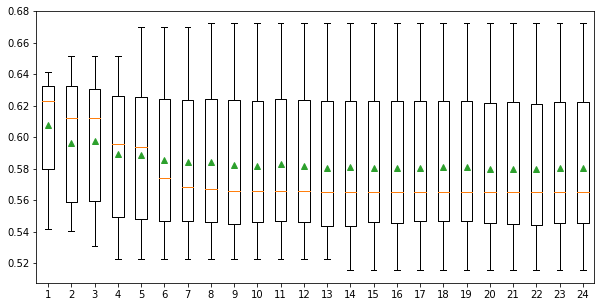

In [39]:
# configurations to test
from matplotlib import pyplot
from scipy.stats import sem

repeats = range(1,25)
results = list()

for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
 
# plot the results
pyplot.figure(figsize=(10, 5))
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

# as we go the standard error, averaged, should get somewhat better

## Grid Search

### Random Forest Example From Class

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

y = df['default']
# X = df.drop(['default'], axis=1) # 0.600194
# X = df[['credit_rating', 'income', 'age']] # 0.61182
# X = df2.drop(['default'], axis=1) # 0.5562
# X = df2[['credit_rating', 'income', 'age']] # 0.52108
X = df[['amount_of_loan', 'income', 'credit_rating']]

rf_class = RandomForestClassifier(criterion='entropy', random_state=0)

# create a dictionary of all values we want to test for n_estimators
param_grid = {"max_depth":[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], "max_features":['auto', 'sqrt', 'log2']}

# create a gridsearch object and fit it to the data
grid_rf_class = GridSearchCV(estimator=rf_class, param_grid=param_grid, scoring='roc_auc', n_jobs=4, cv=5, refit=True, return_train_score=True)

# display the configuration
print(grid_rf_class)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=4,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20],
                         'max_features': ['auto', 'sqrt', 'log2']},
             return_train_score=True, scoring='roc_auc')


In [41]:
grid_rf_class.fit(X, y)

# Read the cv_results property into adataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]

# we should derive an even better score with the optimal configuration
print('The best configuration is: ',best_row)

# Printing the best test score
print('The best test score is: ',best_row['mean_test_score'])

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.280415      0.010412         0.024964        0.002577   
1        0.285640      0.010805         0.027013        0.003256   
2        0.282548      0.011163         0.027075        0.001928   
3        0.314709      0.008085         0.028904        0.003486   
4        0.313727      0.011408         0.027524        0.002005   
5        0.319129      0.019216         0.025278        0.001364   
6        0.366062      0.025537         0.027393        0.002202   
7        0.348850      0.015091         0.028925        0.003959   
8        0.346650      0.009201         0.028258        0.002475   
9        0.379516      0.006641         0.031467        0.002931   
10       0.396483      0.014036         0.030659        0.001712   
11       0.376405      0.009184         0.032032        0.001168   
12       0.412571      0.008960         0.032718        0.002540   
13       0.426388      0.011061         0.035866

I'm not really sure how to interpret this but it looks like with the optimal parameters the model has a 0.691183 accuracy

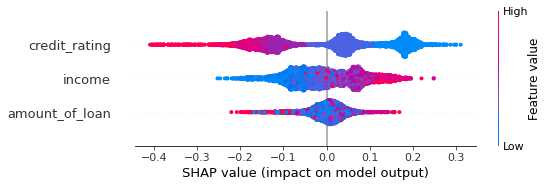

In [45]:
# Showing the shap values
import shap
explainer = shap.TreeExplainer(grid_rf_class.best_estimator_)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values[0], X)

According to these shap values, we still have the same order of importance but it looks like the for these, the higher the income the more likely it is to default on a loan which is the opposite of my shap values from the logistic regression model.

I am really unsure if I am even doing the grid search correctly, I am not sure how to interpret the results or if I can even trust them.

### Logistic Regression

In [43]:
# Trying grid search with logistic regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

y = df['default']
x = df[['amount_of_loan', 'income', 'credit_rating']] #  0.659120

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=46)

# create a dictionary of all values we want to test for n_estimators
param_grid = {"C":[0.001,0.01,0.1,1,10,100,1000], "penalty":['l2']}

# create a gridsearch object and fit it to the data
grid_log_class = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='roc_auc', n_jobs=4, cv=5, refit=True, return_train_score=True)

grid_log_class.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             return_train_score=True, scoring='roc_auc')

In [44]:
# Read the cv_results property into adataframe & print it out
cv_results_df = pd.DataFrame(grid_log_class.cv_results_)
print(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]

# we should derive an even better score with the optimal configuration
print('The best configuration is: ',best_row)

# Printing the best test score
print('The best test score is: ',best_row['mean_test_score'])

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.041291      0.004359         0.003585        0.000799   0.001   
1       0.030246      0.005346         0.002793        0.001466    0.01   
2       0.029214      0.003742         0.002792        0.001465     0.1   
3       0.034557      0.006348         0.003590        0.000489       1   
4       0.029520      0.001673         0.003362        0.000778      10   
5       0.031640      0.004000         0.003025        0.000634     100   
6       0.025977      0.005378         0.002361        0.001182    1000   

  param_penalty                         params  split0_test_score  \
0            l2  {'C': 0.001, 'penalty': 'l2'}           0.681898   
1            l2   {'C': 0.01, 'penalty': 'l2'}           0.682499   
2            l2    {'C': 0.1, 'penalty': 'l2'}           0.682504   
3            l2      {'C': 1, 'penalty': 'l2'}           0.682504   
4            l2     {'C': 10, 'penalty': 'l2'}        

Assuming the test score is what the accuracy is with the optimal parameters, then this model has a 0.682959 accuracy

# Summary and Conclusion

Overall we started with a dataset that was pretty clean could use some transformation work. I removed some of the outliers in an attempt to normalise the data but in the end it turned out to have a worse accuracy on the models

I then ran a for loop of a variety of classification models and found that **Logistic Regression** was the best model with an accuracy of **0.651903**. This was also found after looping through a bunch of different random states while doing a train test split. I found that random state 72 yielded the best accuracy.

The most important features were credit rating, income, and the amount of the loan and as mentioned before the original dataset had a better accuracy than the cleaned dataset.

The shap values for the model showed that the lower numeric credit rating (meaning it was a better rating) was less likely to default on a loan, the higher the income the less likely it was to default on a loan, and the higher the amount of the loan the less likely it was to default on a loan but didn't have as much of an impact as the other two features. This can be depicted in the image below:

![shap_values](LogisticRegressionShap.png)

I then tried a few boosting models such as ADA Boost and Gradient Boost from your example jupyter notebooks but I found that their accuracy was not as high as the logistic regression model. Though I am not fully sure if I did the boosting models correctly.

I also did cross validation using KFold and got an accuracy of 0.607558 which was still lower than the logistic regression model, though once again I am not sure if I did this correctly either.

Finally I tried using grid search to find the optimal parameters for the logistic regression model and the random forest model but I am not sure if I did this correctly either. I am not sure how to interpret the results or if I can even trust them. I also found that the accuracy of the logistic regression model with the optimal parameters was 0.682959 which was higher than the accuracy of the logistic regression model without the optimal parameters. **The accuracy from the random forest model with the optimal parameters was 0.691183** if I am interpreting the results correctly.

Even though I think my highest accuracy was 0.691183, I will give myself the benefit of the doubt and say that the logistic regression model with the original dataset is the best model because it had the highest accuracy and the shap values made sense. Therefore my final reported accuracy is **65.1903%**.